In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import time

from scipy.stats import shapiro  # null hypothesis is data is normally distributed

In [2]:
cnv = pd.read_csv(r'../../data/cnv.csv').drop(columns="Unnamed: 0")

In [62]:
labels = pd.read_csv(r'../../data/labels.csv').drop(columns="Unnamed: 0")

In [63]:
cnv.sort_values(by="PTID", ignore_index=True, inplace=True)
labels.sort_values(by="PTID", ignore_index=True, inplace=True)

In [67]:
sum(labels['PTID'] == cnv['PTID'])

642

In [82]:
data = cnv.filter(regex='HighQual').to_numpy()
targets = np.array([0 if dx == 'CN' else 1 for dx in labels['DX_bl']])

mci_idx = np.where(targets == 1)[0]
cn_idx = np.where(targets == 0)[0]
# data.argmax(axis=1)  # columns 15881 and 14889
# data = data_class_class[:, np.where(data >= 4)[1]]

In [41]:
not_norm_idx = []
for i in range(data.shape[1]):
    _, pval = shapiro(data[:, i].ravel())
    if pval < 0.05:
        not_norm_idx.append(i)

In [45]:
print(len(not_norm_idx))
print(data.shape[1])

100003
100645


In [ ]:
# data_not_norm = 

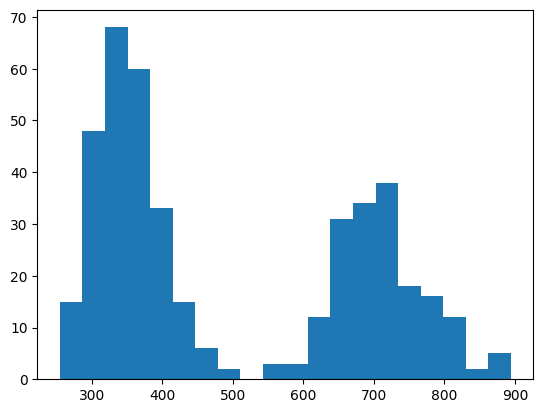

In [91]:
feature = 15881
max_bins = 20
data_class = data[mci_idx, :]

# (880, -560) to (895, 545)

bins = max_bins if max_bins < np.arange(data_class[:, feature].ravel().max() + 2).shape[0] else np.arange(data_class[:, feature].ravel().max() + 2)

# print(np.histogram(data_class[:, feature].ravel(), bins=np.arange(data_class[:, feature].ravel().max() + 2)))
plt.hist(data_class[:, feature].ravel(), bins=bins)

if np.arange(data_class[:, feature].ravel().max() + 2).shape[0] < plt.xticks()[0].shape[0]:
    plt.xticks(np.arange(data_class[:, feature].ravel().max() + 2))


In [89]:

data_class.shape

(421, 18210)

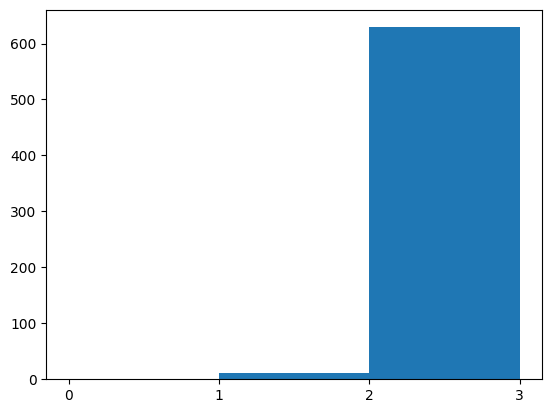

In [94]:
feature = 2
max_bins = 20

# (880, -560) to (895, 545)

bins = max_bins if max_bins < np.arange(data[:, feature].ravel().max() + 2).shape[0] else np.arange(data[:, feature].ravel().max() + 2)

# print(np.histogram(data[:, feature].ravel(), bins=np.arange(data[:, feature].ravel().max() + 2)))
plt.hist(data[:, feature].ravel(), bins=bins)

if np.arange(data[:, feature].ravel().max() + 2).shape[0] < plt.xticks()[0].shape[0]:
    plt.xticks(np.arange(data[:, feature].ravel().max() + 2))
